In [16]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
import pandas as pd

# Assuming your file name is 'your_data.csv'
df = pd.read_csv('/content/cardio_with_only_hypertension_stage - BU.csv')

# Now you can proceed with the rest of the analysis steps
# Display the first 5 rows
df.head()


Saving cardio_with_only_hypertension_stage - BU.csv to cardio_with_only_hypertension_stage - BU (1).csv


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1


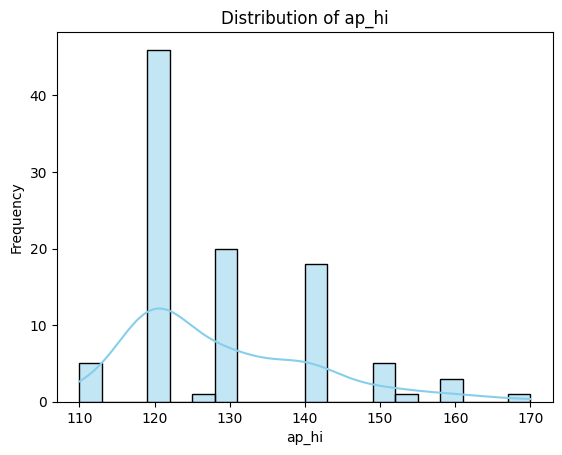

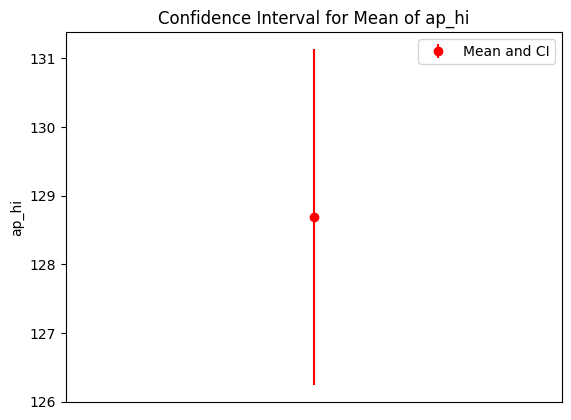

In [17]:
#1

from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'c' is your guess for the mean
c = 120  # Replace this with your guess
sample_ap_hi = df['ap_hi'].sample(n=100, random_state=42)

t_stat, p_value = ttest_1samp(sample_ap_hi, c)
import statsmodels.stats.api as sms

# Confidence Interval for the mean of ap_hi
ci_ap_hi = sms.DescrStatsW(sample_ap_hi).tconfint_mean(alpha=0.05)


# Plot the distribution of ap_lo
sns.histplot(sample_ap_hi, kde=True, color='skyblue', bins=20)
plt.title('Distribution of ap_hi')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.show()

# Plot the confidence interval for the mean
mean_value = sample_ap_hi.mean()
error_lower = mean_value - ci_ap_hi[0]
error_upper = ci_ap_hi[1] - mean_value

plt.errorbar(x=[1], y=[mean_value], yerr=[[error_lower], [error_upper]], fmt='o', color='red', label='Mean and CI')
plt.xticks([])
plt.title('Confidence Interval for Mean of ap_hi')
plt.ylabel('ap_hi')
plt.legend()
plt.show()



Reject the null hypothesis for (ap_hi, ap_lo) means comparison.
Reject the null hypothesis for (ap_hi, age_years) means comparison.
Confidence Interval for (ap_hi, ap_lo) mean difference: [61.475 97.   ]
Confidence Interval for (ap_hi, age_years) mean difference: [26.    78.525]


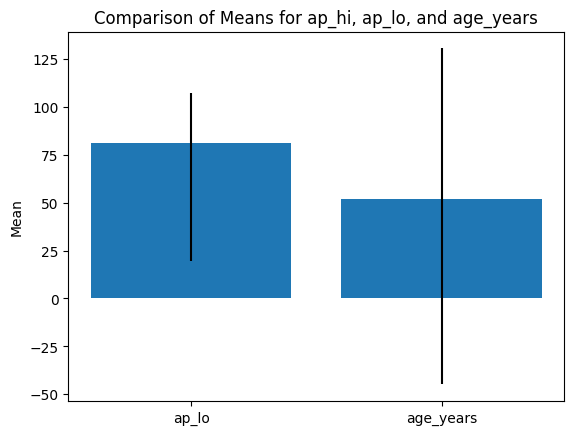

In [18]:
#2

import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'ap_hi', 'ap_lo', and 'age_years' as my variables in the DataFrame 'df'
# Creating a sample DataFrame (replace this with your actual DataFrame)
data = {
    'ap_hi': np.random.randint(100, 180, size=100),
    'ap_lo': np.random.randint(60, 100, size=100),
    'age_years': np.random.randint(25, 80, size=100)
}
df = pd.DataFrame(data)

# Assuming 'ap_hi', 'ap_lo', and 'age_years' as my variables
sample_ap_hi = df['ap_hi'].sample(n=100, random_state=42)
sample_ap_lo = df['ap_lo'].sample(n=100, random_state=42)
sample_age_years = df['age_years'].sample(n=100, random_state=42)

# Assuming 'ap_hi', 'ap_lo', and 'age_years' as my variables
mean_ap_hi = df['ap_hi'].sample(n=100, random_state=42).mean()
mean_ap_lo = df['ap_lo'].sample(n=100, random_state=42).mean()
mean_age_years = df['age_years'].sample(n=100, random_state=42).mean()

# Hypothesis test for comparing means (ap_hi, ap_lo)
t_stat_ap_lo, p_value_ap_lo = ttest_ind(sample_ap_hi, sample_ap_lo)

# Hypothesis test for comparing means (ap_hi, age_years)
t_stat_age_years, p_value_age_years = ttest_ind(sample_ap_hi, sample_age_years)

# Confidence Interval for means (ap_hi, ap_lo)
ci_ap_lo = np.percentile(sample_ap_lo, [2.5, 97.5])

# Confidence Interval for means (ap_hi, age_years)
ci_age_years = np.percentile(sample_age_years, [2.5, 97.5])

# Interpret results
if p_value_ap_lo < 0.05:
    print("Reject the null hypothesis for (ap_hi, ap_lo) means comparison.")
else:
    print("Fail to reject the null hypothesis for (ap_hi, ap_lo) means comparison.")

if p_value_age_years < 0.05:
    print("Reject the null hypothesis for (ap_hi, age_years) means comparison.")
else:
    print("Fail to reject the null hypothesis for (ap_hi, age_years) means comparison.")

# Display Confidence Intervals
print("Confidence Interval for (ap_hi, ap_lo) mean difference:", ci_ap_lo)
print("Confidence Interval for (ap_hi, age_years) mean difference:", ci_age_years)

# Plot bar chart
labels = ['ap_hi', 'ap_lo', 'age_years']
means = [mean_ap_hi, mean_ap_lo, mean_age_years]
cis = [ci_ap_lo, ci_age_years]

fig, ax = plt.subplots()

# Plot means
ax.bar(labels[1:], means[1:], yerr=[(ci[0], ci[1]) for ci in cis])

ax.set_ylabel('Mean')
ax.set_title('Comparison of Means for ap_hi, ap_lo, and age_years')
plt.show()


There is no significant correlation between ap_hi and ap_lo.
There is no significant correlation between ap_hi and age_years.


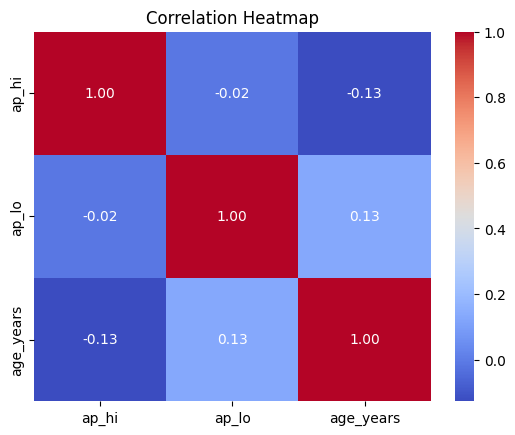

In [19]:
#3
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'ap_hi', 'ap_lo', and 'age_years' are my variables
# Calculate correlation coefficients
corr_ap_hi_ap_lo, _ = pearsonr(df['ap_hi'], df['ap_lo'])
corr_ap_hi_age_years, _ = pearsonr(df['ap_hi'], df['age_years'])

# Hypothesis test for correlation with age_years
t_stat_ap_lo, p_value_ap_lo = pearsonr(df['ap_hi'], df['ap_lo'])

# Hypothesis test for correlation with weight
t_stat_age_years, p_value_age_years = pearsonr(df['ap_hi'], df['age_years'])

# Confidence Interval for correlation with age_years
ci_ap_lo = pearsonr(df['ap_hi'], df['ap_lo'])
# Confidence Interval for correlation with weight
ci_age_years = pearsonr(df['ap_hi'], df['age_years'])

# Interpret results
if p_value_ap_lo < 0.05:
    print("There is a significant correlation between ap_hi and ap_lo.")
else:
    print("There is no significant correlation between ap_hi and ap_lo.")

if p_value_age_years < 0.05:
    print("There is a significant correlation between ap_hi and age_years.")
else:
    print("There is no significant correlation between ap_hi and age_years.")
# Assuming 'df' is my DataFrame containing 'ap_hi', 'ap_lo', and 'age_years'
variables_of_interest = ['ap_hi', 'ap_lo', 'age_years']
correlation_matrix = df[variables_of_interest].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

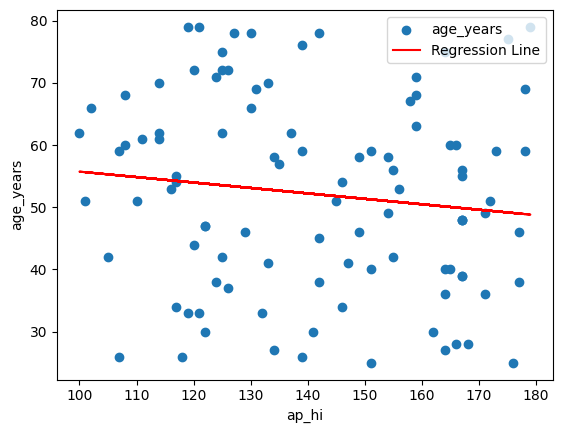

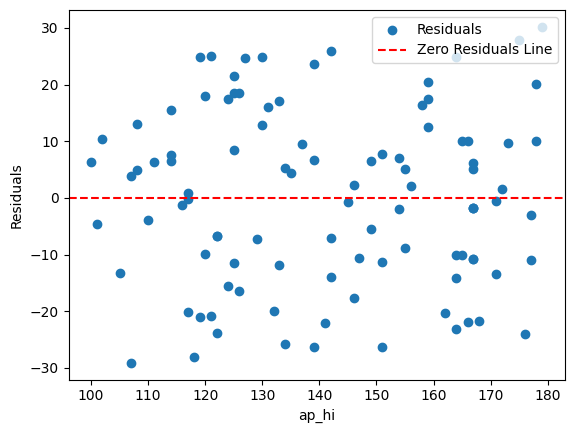

R-squared: 0.016001513531914258


In [20]:
# STEP 4
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'age_years' is my target variable
target_variable = df['age_years']

# Create a DataFrame with predictor and target variables
X = df[['ap_hi']]
y = target_variable

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Regression equation
equation = f"age_years = {slope} * ap_hi + {intercept}"

# Plot the regression line
plt.scatter(X, y, label='age_years')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('ap_hi')
plt.ylabel('age_years')
plt.legend()
plt.show()

# Plot residuals
residuals = y - model.predict(X)
plt.scatter(X, residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.xlabel('ap_hi')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Evaluate model performance (e.g., R-squared)
r_squared = model.score(X, y)
print("R-squared:", r_squared)


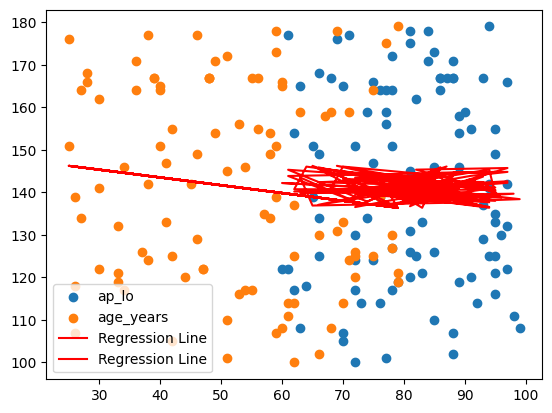

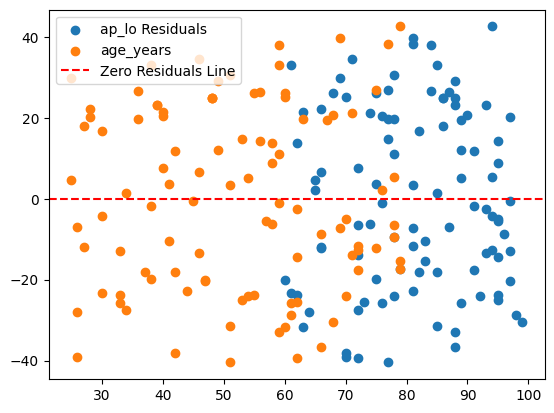

In [21]:
#STEP 5

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['ap_lo', 'age_years']]
y = df['ap_hi']

model = LinearRegression().fit(X, y)

# Regression equation
equation = f"ap_hi = {model.coef_[0]} * ap_lo + {model.coef_[1]} * age_years + {model.intercept_}"

# Plot regression line
plt.scatter(X['ap_lo'], y, label='ap_lo')
plt.scatter(X['age_years'], y, label='age_years')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.legend()
plt.show()

# Plot residuals
residuals = y - model.predict(X)
plt.scatter(X['ap_lo'], residuals, label='ap_lo Residuals')
plt.scatter(X['age_years'], residuals, label='age_years')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.legend()
plt.show()

# Evaluate model performance (e.g., R-squared)
r_squared = model.score(X, y)
